Problem Statement : Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sn
from statsmodels.formula.api import ols

In [3]:
df=pd.read_csv("SalaryData.csv")

In [11]:
df.head(20)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [12]:
df.tail(20)

,Education,Occupation,Salary
20,Bachelors,Prof-specialty,100135
21,Bachelors,Prof-specialty,133696
22,Bachelors,Sales,149909
23,Bachelors,Sales,191712
24,Bachelors,Sales,167431
25,Bachelors,Sales,260151
26,HS-grad,Sales,50103
27,HS-grad,Sales,50122
28,HS-grad,Sales,52242
29,HS-grad,Adm-clerical,75333


In [13]:
salary_Doctorate=df.loc[(df["Education"]=='Doctorate'),'Salary']
salary_Bachelors=df.loc[(df["Education"]=='Bachelors'),'Salary']
salary_Hsgrad=df.loc[(df["Education"]=='HS-grad'),'Salary']

In [10]:
salary_Bachelors

Series([], Name: Salary, dtype: int64)

In [14]:
print(stats.f_oneway(salary_Doctorate,salary_Bachelors,salary_Hsgrad))

F_onewayResult(statistic=nan, pvalue=nan)


C:\ProgramData\Anaconda3\ac\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [18]:
#level of Significance a =0.05
salary_prof = df.loc[(df["Occupation"] == 'Prof-specialty'),'Salary']
salary_Sales = df.loc[(df["Occupation"] == 'Sales'),'Salary']
salary_Admclerical = df.loc[(df["Occupation"] == 'Adm-clerical'),'Salary']
salary_Execmanagerial= df.loc[(df["Occupation"] == 'Exec-managerial'),'Salary']

In [20]:
print(stats.f_oneway(salary_prof,salary_Sales,salary_Admclerical,salary_Execmanagerial))

F_onewayResult(statistic=nan, pvalue=nan)


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [22]:
m_comp = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Education'],alpha=0.05)

In [23]:
m_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bachelors,Doctorate,43274.0667,0.0146,7541.1439,79006.9894,True
Bachelors,HS-grad,-90114.1556,0.001,-132035.1958,-48193.1153,True
Doctorate,HS-grad,-133388.2222,0.001,-174815.0876,-91961.3569,True


From the output it is clear that mean salary is different for each pair of means

<function matplotlib.pyplot.show(close=None, block=None)>

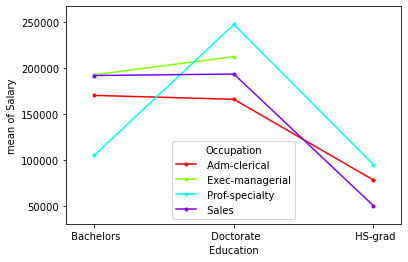

In [30]:
fig=interaction_plot(x=df['Education'],trace=df['Occupation'],response=df['Salary'],ylabel='Salary',xlabel='Education')
plt.show

In [39]:
model = ols('Salary ~ Education * Occupation',data=df).fit()
anova_table=sn.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
Occupation,3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
Education:Occupation,6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN
